In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


Data Collection

In [4]:
Airlines = pd.read_csv("../Clustering/EastWestAirlines.csv")
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Normalization

In [6]:
def norm_func(i):
    x=(i-i.min())/(i.max() - i.min())
    return(x)

df_norm = norm_func(Airlines.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


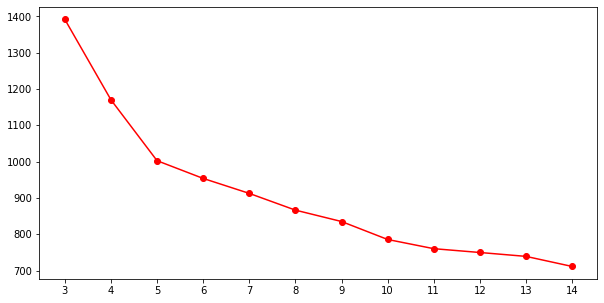

In [8]:
#Generate Elbow Curve

k = list(range(3,15))

Total_WSS=[]

for i in k:
    kmean=KMeans(n_clusters=i).fit(df_norm)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmean.labels_==j,:],kmean.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean" )))
    Total_WSS.append(sum(WSS))
plt.figure(figsize=(10,5))
plt.plot(k,Total_WSS,'ro-') 
plt.xticks(k)
plt.show()

In [9]:
# Applying K-means clustering

Kmean_model=KMeans(n_clusters=6).fit(df_norm)
model_labels=pd.Series(Kmean_model.labels_)  # converting numpy array into pandas series object 
Kmean_model.labels_

array([5, 5, 5, ..., 3, 1, 1])

In [10]:
Airlines['cluster']=model_labels # creating a  new column and assigning it to new column 
Airlines = Airlines.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

Airlines.iloc[:,1:11].groupby(Airlines.cluster).mean()
Airlines.sort_values(by=['cluster'], inplace=True)

Airlines.head()


,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
1999,0,2016,327126,1452,5,1,1,97997,25,350,3,4440,1
726,0,736,13781,0,4,1,1,48914,19,500,1,6269,1
725,0,735,151904,733,5,1,1,76440,25,950,8,6273,1
718,0,728,60976,0,5,1,1,97318,31,7000,14,6282,1
711,0,721,48161,0,4,1,1,41174,24,0,0,6294,1


In [11]:
Airlines.to_csv("EastWestAirlines_kmeans.csv")

In [16]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(Airlines.groupby('cluster').mean(),1))
kmeans_mean_cluster

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,,
0,1015.6,152302.3,240.8,4.6,1.0,1.1,67975.4,22.9,995.9,3.0,5949.6,1.0
1,3204.9,33097.3,94.1,1.1,1.0,1.0,3244.5,6.2,212.9,0.6,1992.4,0.0
2,1904.8,83529.2,290.5,1.2,1.0,1.0,8850.4,10.5,1030.1,3.1,4338.9,1.0
3,2060.4,75376.3,166.5,3.4,1.0,1.0,28859.6,18.2,502.4,1.5,4050.0,1.0
4,1840.5,118297.3,73.5,3.6,1.0,1.0,31384.4,17.2,224.1,0.6,4419.6,0.0
5,1183.4,49921.6,89.9,1.1,1.0,1.0,3467.1,6.9,243.8,0.7,5567.9,0.0
